# 1. Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
import tensorflow_hub as hub
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

import cv2
import itertools
import pathlib
import warnings
import os
import random
import time
import gc
from IPython.display import Markdown, display
from PIL import Image
from random import randint
import warnings 
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import keras
from tensorflow import keras
from keras import Sequential
from keras import layers
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout,SeparableConv2D, Activation, BatchNormalization, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# 2. Load Dataset

In [4]:
data = "/kaggle/input/food-image-classification-dataset/Food Classification dataset"

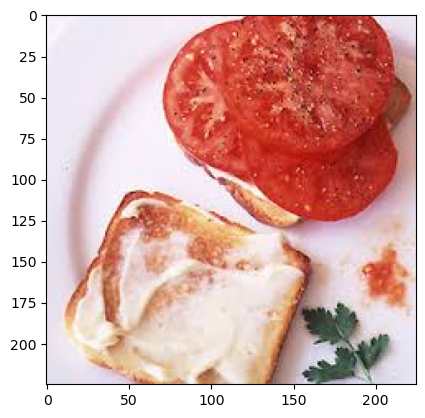

In [5]:
img = mpimg.imread("/kaggle/input/food-image-classification-dataset/Food Classification dataset/Sandwich/Sandwich-Train (1).jpeg")
plt.imshow(img)

In [6]:
# Define parameters values
IMG_SIZE = (256, 256)
VALID_SPLIT = 0.3
BATCH_SIZE = 32
SEED = 42
PATH = "/kaggle/input/food-image-classification-dataset/Food Classification dataset"

# Get train image with generator
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 23873 files belonging to 34 classes.
Using 16712 files for training.


In [7]:
# Get validation image with generator
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Found 23873 files belonging to 34 classes.
Using 7161 files for validation.


# 3. Data Visualisation EDA

In [8]:
# Collecte the class names.
path = "/kaggle/input/food-image-classification-dataset/Food Classification dataset"
class_names = sorted(os.listdir(path))
n_classes = len(class_names)

# Print
print("No. Classes : {}".format(n_classes))
print("Classes     : {}".format(class_names))

No. Classes : 34
Classes     : ['Baked Potato', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog', 'Sandwich', 'Taco', 'Taquito', 'apple_pie', 'burger', 'butter_naan', 'chai', 'chapati', 'cheesecake', 'chicken_curry', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice', 'ice_cream', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'omelette', 'paani_puri', 'pakode', 'pav_bhaji', 'pizza', 'samosa', 'sushi']


In [9]:
# Get class names
classes = train_ds.class_names

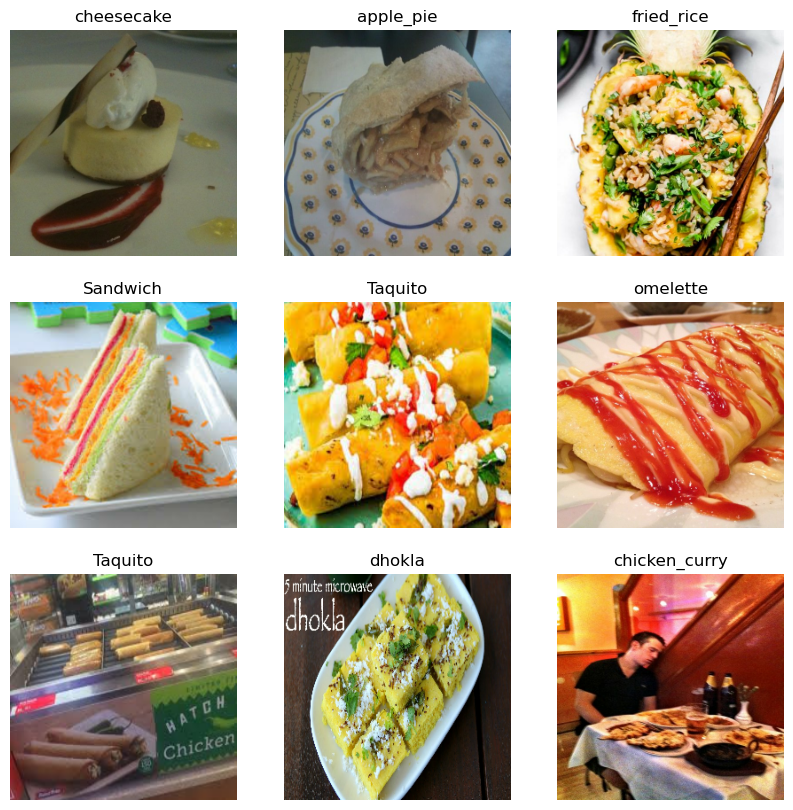

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")

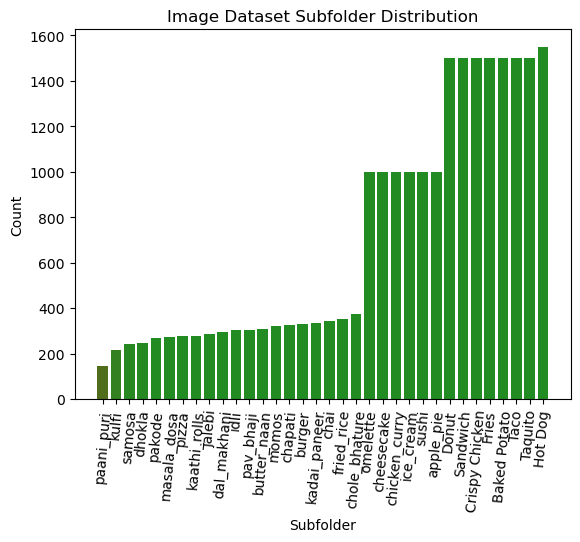

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set the path for the dataset directory
dataset_dir = path

# Initialize a dictionary to store the counts of images in each subfolder
subfolder_counts = {}

# Iterate over the subfolders in the dataset directory
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Count the number of image files in each subfolder
        subfolder_counts[subfolder] = len(os.listdir(subfolder_path))

# Sort the subfolder counts in ascending order
sorted_counts = sorted(subfolder_counts.items(), key=lambda x: x[1])
labels, counts = zip(*sorted_counts)

# Define brown-to-green color gradient
cmap = mcolors.LinearSegmentedColormap.from_list('BrownToGreen', ['#8B4513', '#228B22'])

# Create the bar graph with color gradient
plt.bar(labels, counts, color=cmap(counts))
plt.xlabel('Subfolder')
plt.ylabel('Count')
plt.title('Image Dataset Subfolder Distribution')
plt.xticks(rotation=85)
plt.show()

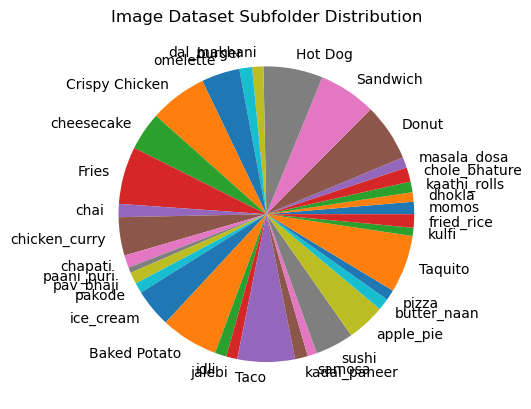

In [12]:
import os
import matplotlib.pyplot as plt

# Set the path for the dataset directory
dataset_dir = path

# Initialize a dictionary to store the counts of images in each subfolder
subfolder_counts = {}

# Iterate over the subfolders in the dataset directory
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Count the number of image files in each subfolder
        subfolder_counts[subfolder] = len(os.listdir(subfolder_path))

# Extract the subfolder names and their respective counts
labels = list(subfolder_counts.keys())
counts = list(subfolder_counts.values())

# Create the pie chart
plt.pie(counts, labels=labels)
plt.title('Image Dataset Subfolder Distribution')

plt.show()


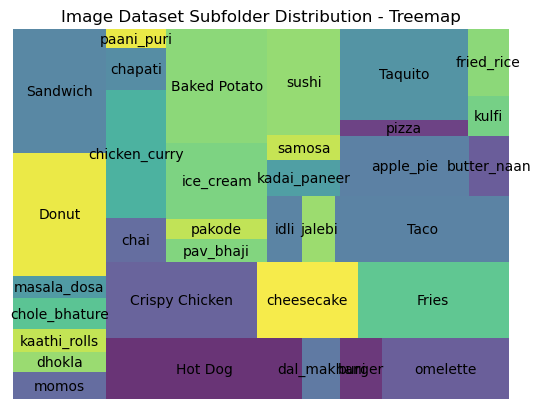

In [13]:
import os
import matplotlib.pyplot as plt
import squarify

# Set the path for the dataset directory
dataset_dir = path

# Initialize a dictionary to store the counts of images in each subfolder
subfolder_counts = {}

# Iterate over the subfolders in the dataset directory
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Count the number of image files in each subfolder
        subfolder_counts[subfolder] = len(os.listdir(subfolder_path))

# Extract the subfolder names and their respective counts
labels = list(subfolder_counts.keys())
counts = list(subfolder_counts.values())

# Calculate the relative sizes for the treemap
sizes = [count/sum(counts) for count in counts]

# Create the treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8)

# Configure plot settings
plt.axis('off')
plt.title('Image Dataset Subfolder Distribution - Treemap')
plt.show()

Preprocessing

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


In [15]:
IMG_SIZE = (256, 256)
VALID_SPLIT = 0.3
BATCH_SIZE = 32
SEED = 42
PATH = "/kaggle/input/food-image-classification-dataset/Food Classification dataset"


In [16]:
def decode_img(image):
    """ Decode the image to ensure it is readable. """
    try:
        img = tf.image.decode_jpeg(image, channels=3)
        img = tf.image.resize(img, IMG_SIZE)
        return img
    except tf.errors.InvalidArgumentError:
        return None  # Return None for invalid image

def load_image(image_path):
    """ Read the image from path and decode. """
    img = tf.io.read_file(image_path)
    img = decode_img(img)
    if img is None:
        return tf.zeros(IMG_SIZE)  # Return a black image as a placeholder
    return img


In [17]:
# Load and preprocess training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    validation_split=VALID_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Apply normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization and data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Applying augmentation and normalization
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Prefetch to improve performance
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Found 23873 files belonging to 34 classes.
Using 16712 files for training.
Found 23873 files belonging to 34 classes.
Using 7161 files for validation.


****Build the ANN Model****

In [18]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),  # Flatten input image
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(34, activation='softmax')  # 34 output classes
])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 512)               100663808 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [22]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [27]:
import tensorflow as tf
import os
import glob
import shutil
import tempfile
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Rescaling, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

# Paths
original_data_dir = "/kaggle/input/food-image-classification-dataset/Food Classification dataset"
selected_classes = ['Baked Potato', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog']

# Step 1: Filter valid, readable, TensorFlow-compatible images
def prepare_clean_data(original_dir, selected_classes):
    temp_dir = tempfile.mkdtemp()
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

    for class_name in selected_classes:
        src_folder = os.path.join(original_dir, class_name)
        dst_folder = os.path.join(temp_dir, class_name)
        os.makedirs(dst_folder, exist_ok=True)

        for file in os.listdir(src_folder):
            src_file = os.path.join(src_folder, file)
            if file.lower().endswith(valid_extensions):
                try:
                    # Open and re-save image to guarantee proper encoding
                    with Image.open(src_file) as img:
                        img = img.convert('RGB')  # force RGB mode
                        dst_file = os.path.join(dst_folder, file)
                        img.save(dst_file, format='JPEG')  # re-save as good JPEG
                except Exception as e:
                    print(f"Skipping corrupted or incompatible image: {src_file}")
                    continue
    return temp_dir

filtered_data_dir = prepare_clean_data(original_data_dir, selected_classes)

# Step 2: Load datasets
batch_size = 32
img_size = (256, 256)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    filtered_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.3,
    subset='training',
    seed=123,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    filtered_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    validation_split=0.3,
    subset='validation',
    seed=123,
    shuffle=True
)

# Step 3: Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Step 4: Build AlexNet Model
model = Sequential([
    Rescaling(1./255, input_shape=(256, 256, 3)),
    Conv2D(96, (11, 11), strides=4, activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_classes), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 5: Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1
)


Found 7548 files belonging to 5 classes.
Using 5284 files for training.
Found 7548 files belonging to 5 classes.
Using 2264 files for validation.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                    

71/71 [==============================] - 2s 28ms/step - loss: 1.5228 - accuracy: 0.7080
Validation Loss: 1.5228
Validation Accuracy: 0.7080
1/1 [==============================] - 0s 106ms/step
F1 Score: 0.7078
Precision: 0.7178
Recall: 0.7080


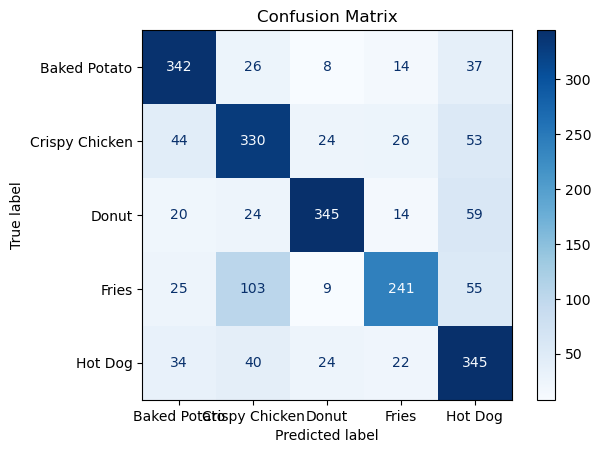

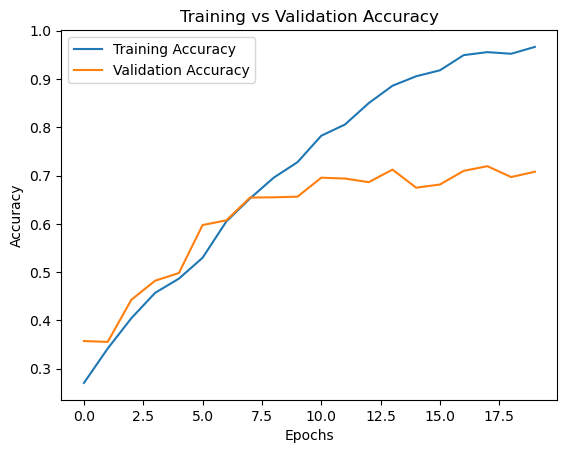

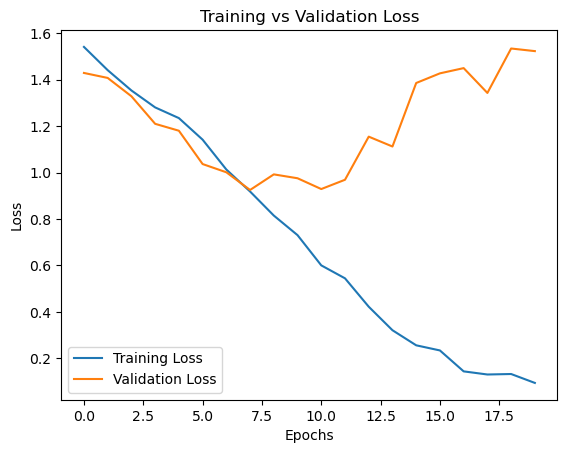

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Evaluate the model with validation data
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Step 2: Make predictions on the validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    # Get true labels
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    
    # Get predicted labels
    y_pred.extend(np.argmax(model.predict(images), axis=1))

# Step 3: Calculate F1 Score, Precision, and Recall
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Step 4: Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_classes)

cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 5: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Step 6: Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
